<a href="https://colab.research.google.com/github/Skannan03/imarticus_project/blob/main/hepatits_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hepatits C Prediction

#Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


#Importing the dataset

In [ ]:
df=pd.read_csv("/content/HepatitisCdata.csv")
df.head()

Unnamed: 0       Category  Age Sex   ALB   ALP   ALT   AST   BIL    CHE  \
0           1  0=Blood Donor   32   m  38.5  52.5   7.7  22.1   7.5   6.93   
1           2  0=Blood Donor   32   m  38.5  70.3  18.0  24.7   3.9  11.17   
2           3  0=Blood Donor   32   m  46.9  74.7  36.2  52.6   6.1   8.84   
3           4  0=Blood Donor   32   m  43.2  52.0  30.6  22.6  18.9   7.33   
4           5  0=Blood Donor   32   m  39.2  74.1  32.6  24.8   9.6   9.15   

   CHOL   CREA   GGT  PROT  
0  3.23  106.0  12.1  69.0  
1  4.80   74.0  15.6  76.5  
2  5.20   86.0  33.2  79.3  
3  4.74   80.0  33.8  75.7  
4  4.32   76.0  29.9  68.7

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


In [ ]:
df.describe()

Unnamed: 0         Age         ALB         ALP         ALT         AST  \
count  615.000000  615.000000  614.000000  597.000000  614.000000  615.000000   
mean   308.000000   47.408130   41.620195   68.283920   28.450814   34.786341   
std    177.679487   10.055105    5.780629   26.028315   25.469689   33.090690   
min      1.000000   19.000000   14.900000   11.300000    0.900000   10.600000   
25%    154.500000   39.000000   38.800000   52.500000   16.400000   21.600000   
50%    308.000000   47.000000   41.950000   66.200000   23.000000   25.900000   
75%    461.500000   54.000000   45.200000   80.100000   33.075000   32.900000   
max    615.000000   77.000000   82.200000  416.600000  325.300000  324.000000   

              BIL         CHE        CHOL         CREA         GGT        PROT  
count  615.000000  615.000000  605.000000   615.000000  615.000000  614.000000  
mean    11.396748    8.196634    5.368099    81.287805   39.533171   72.044137  
std     19.673150    2.205657    1.132728    49.756166   54.661071    5.402636  
min      0.800000    1.420000    1.430000     8.000000    4.500000   44.800000  
25%      5.300000    6.935000    4.610000    67.000000   15.700000   69.300000  
50%      7.300000    8.260000    5.300000    77.000000   23.300000   72.200000  
75%     11.200000    9.590000    6.060000    88.000000   40.200000   75.400000  
max    254.000000   16.410000    9.670000  1079.100000  650.900000   90.000000

In [ ]:
df.isnull().sum()

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64

#Data Preprocessing

In [ ]:
def data_prep(data):
  data['ALB']=np.where(data['ALB'].isna(),data['ALB'].median(skipna=True),data['ALB'])
  data['ALP']=np.where(data['ALP'].isna(),data['ALP'].median(skipna=True),data['ALP'])
  data['ALT']=np.where(data['ALT'].isna(),data['ALT'].median(skipna=True),data['ALT'])
  data['CHOL']=np.where(data['CHOL'].isna(),data['CHOL'].median(skipna=True),data['CHOL'])
  data['PROT']=np.where(data['PROT'].isna(),data['PROT'].median(skipna=True),data['PROT'])
data_prep(df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         615 non-null    float64
 5   ALP         615 non-null    float64
 6   ALT         615 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        615 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        615 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


In [ ]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    object 
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    object 
 3   ALB       615 non-null    float64
 4   ALP       615 non-null    float64
 5   ALT       615 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      615 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      615 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 62.6+ KB


#Checking Outliers

In [ ]:
df.skew()

<ipython-input-11-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


Age      0.267134
ALB     -0.177189
ALP      4.730036
ALT      5.510989
AST      4.940327
BIL      8.385437
CHE     -0.110233
CHOL     0.381835
CREA    15.169291
GGT      5.632734
PROT    -0.964607
dtype: float64

<Axes: >

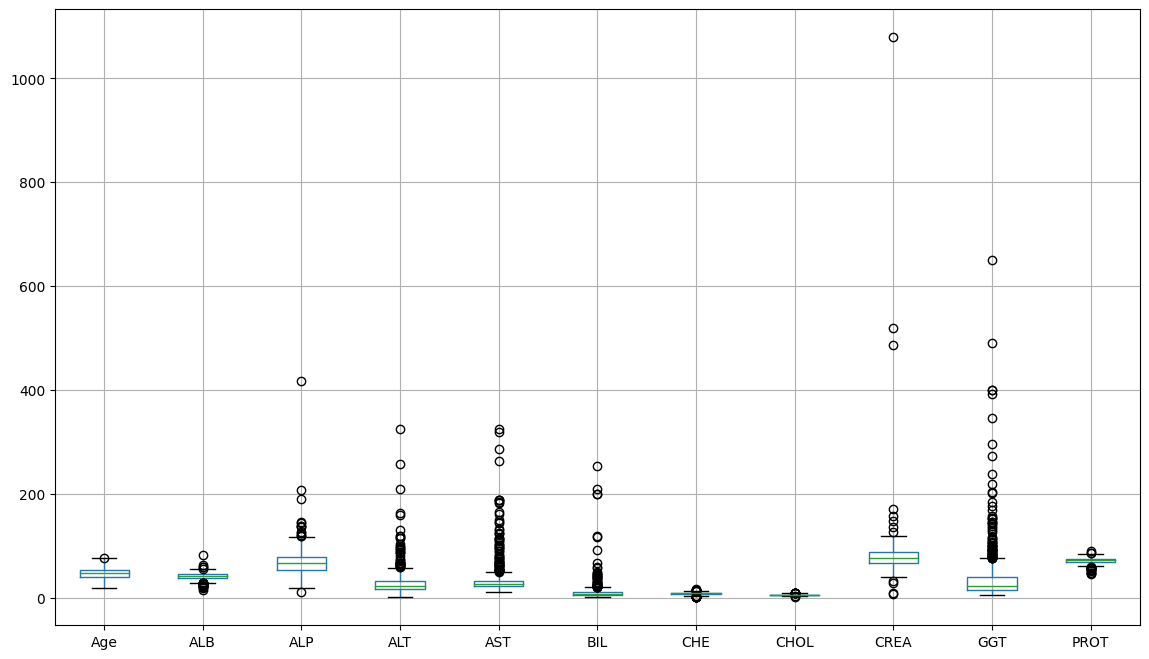

In [ ]:
plt.figure(figsize=(14,8))
df.boxplot()

#Removing Outliers

In [ ]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-1.5*IQR
    upper_range=Q3+1.5*IQR
    return lower_range,upper_range

In [ ]:
low_leadtime,high_leadtime=remove_outlier(df['ALP'])
df['ALP']=np.where(df['ALP']>high_leadtime,high_leadtime,df['ALP'])
df['ALP']=np.where(df['ALP']<low_leadtime,low_leadtime,df['ALP'])


In [ ]:
low_leadtime,high_leadtime=remove_outlier(df['AST'])
df['AST']=np.where(df['AST']>high_leadtime,high_leadtime,df['AST'])
df['AST']=np.where(df['AST']<low_leadtime,low_leadtime,df['AST'])

In [ ]:
low_leadtime,high_leadtime=remove_outlier(df['ALT'])
df['ALT']=np.where(df['ALT']>high_leadtime,high_leadtime,df['ALT'])
df['ALT']=np.where(df['ALT']<low_leadtime,low_leadtime,df['ALT'])

In [ ]:
low_leadtime,high_leadtime=remove_outlier(df['BIL'])
df['BIL']=np.where(df['BIL']>high_leadtime,high_leadtime,df['BIL'])
df['BIL']=np.where(df['BIL']<low_leadtime,low_leadtime,df['BIL'])

In [ ]:
low_leadtime,high_leadtime=remove_outlier(df['CREA'])
df['CREA']=np.where(df['CREA']>high_leadtime,high_leadtime,df['CREA'])
df['CREA']=np.where(df['CREA']<low_leadtime,low_leadtime,df['CREA'])

In [ ]:
low_leadtime,high_leadtime=remove_outlier(df['GGT'])
df['GGT']=np.where(df['GGT']>high_leadtime,high_leadtime,df['GGT'])
df['GGT']=np.where(df['GGT']<low_leadtime,low_leadtime,df['GGT'])

<Axes: >

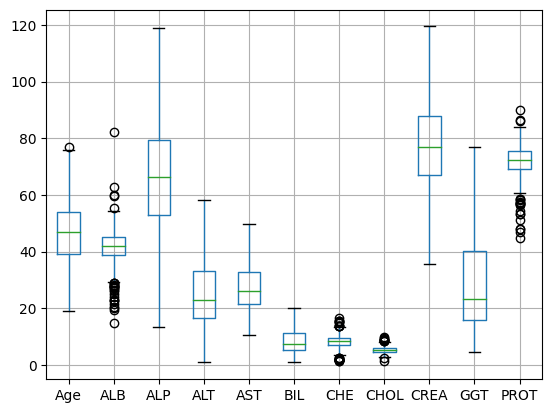

In [ ]:
df.boxplot()

In [ ]:
df.skew()

<ipython-input-21-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


Age     0.267134
ALB    -0.177189
ALP     0.362464
ALT     0.848583
AST     0.913613
BIL     0.962616
CHE    -0.110233
CHOL    0.381835
CREA    0.313083
GGT     1.102069
PROT   -0.964607
dtype: float64

#Data Visualization

In [ ]:
df['Category'].value_counts()

0=Blood Donor             533
3=Cirrhosis                30
1=Hepatitis                24
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: Category, dtype: int64

<Axes: ylabel='Category'>

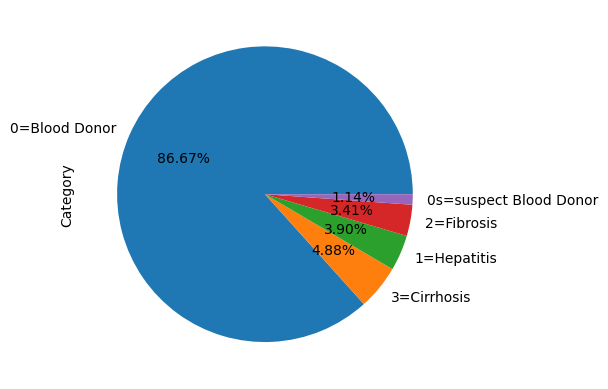

In [ ]:
df['Category'].value_counts().plot(kind='pie',autopct='%1.2f%%')

<ipython-input-24-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

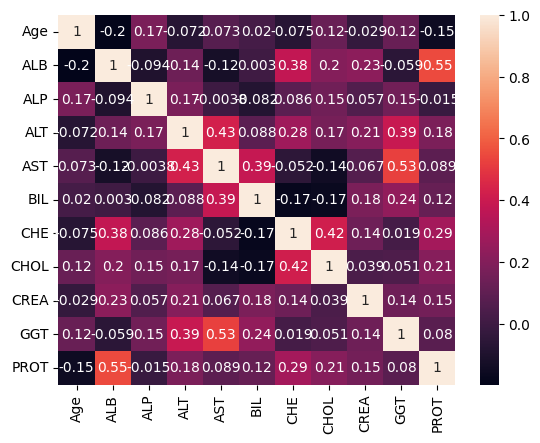

In [ ]:
sns.heatmap(df.corr(),annot=True)

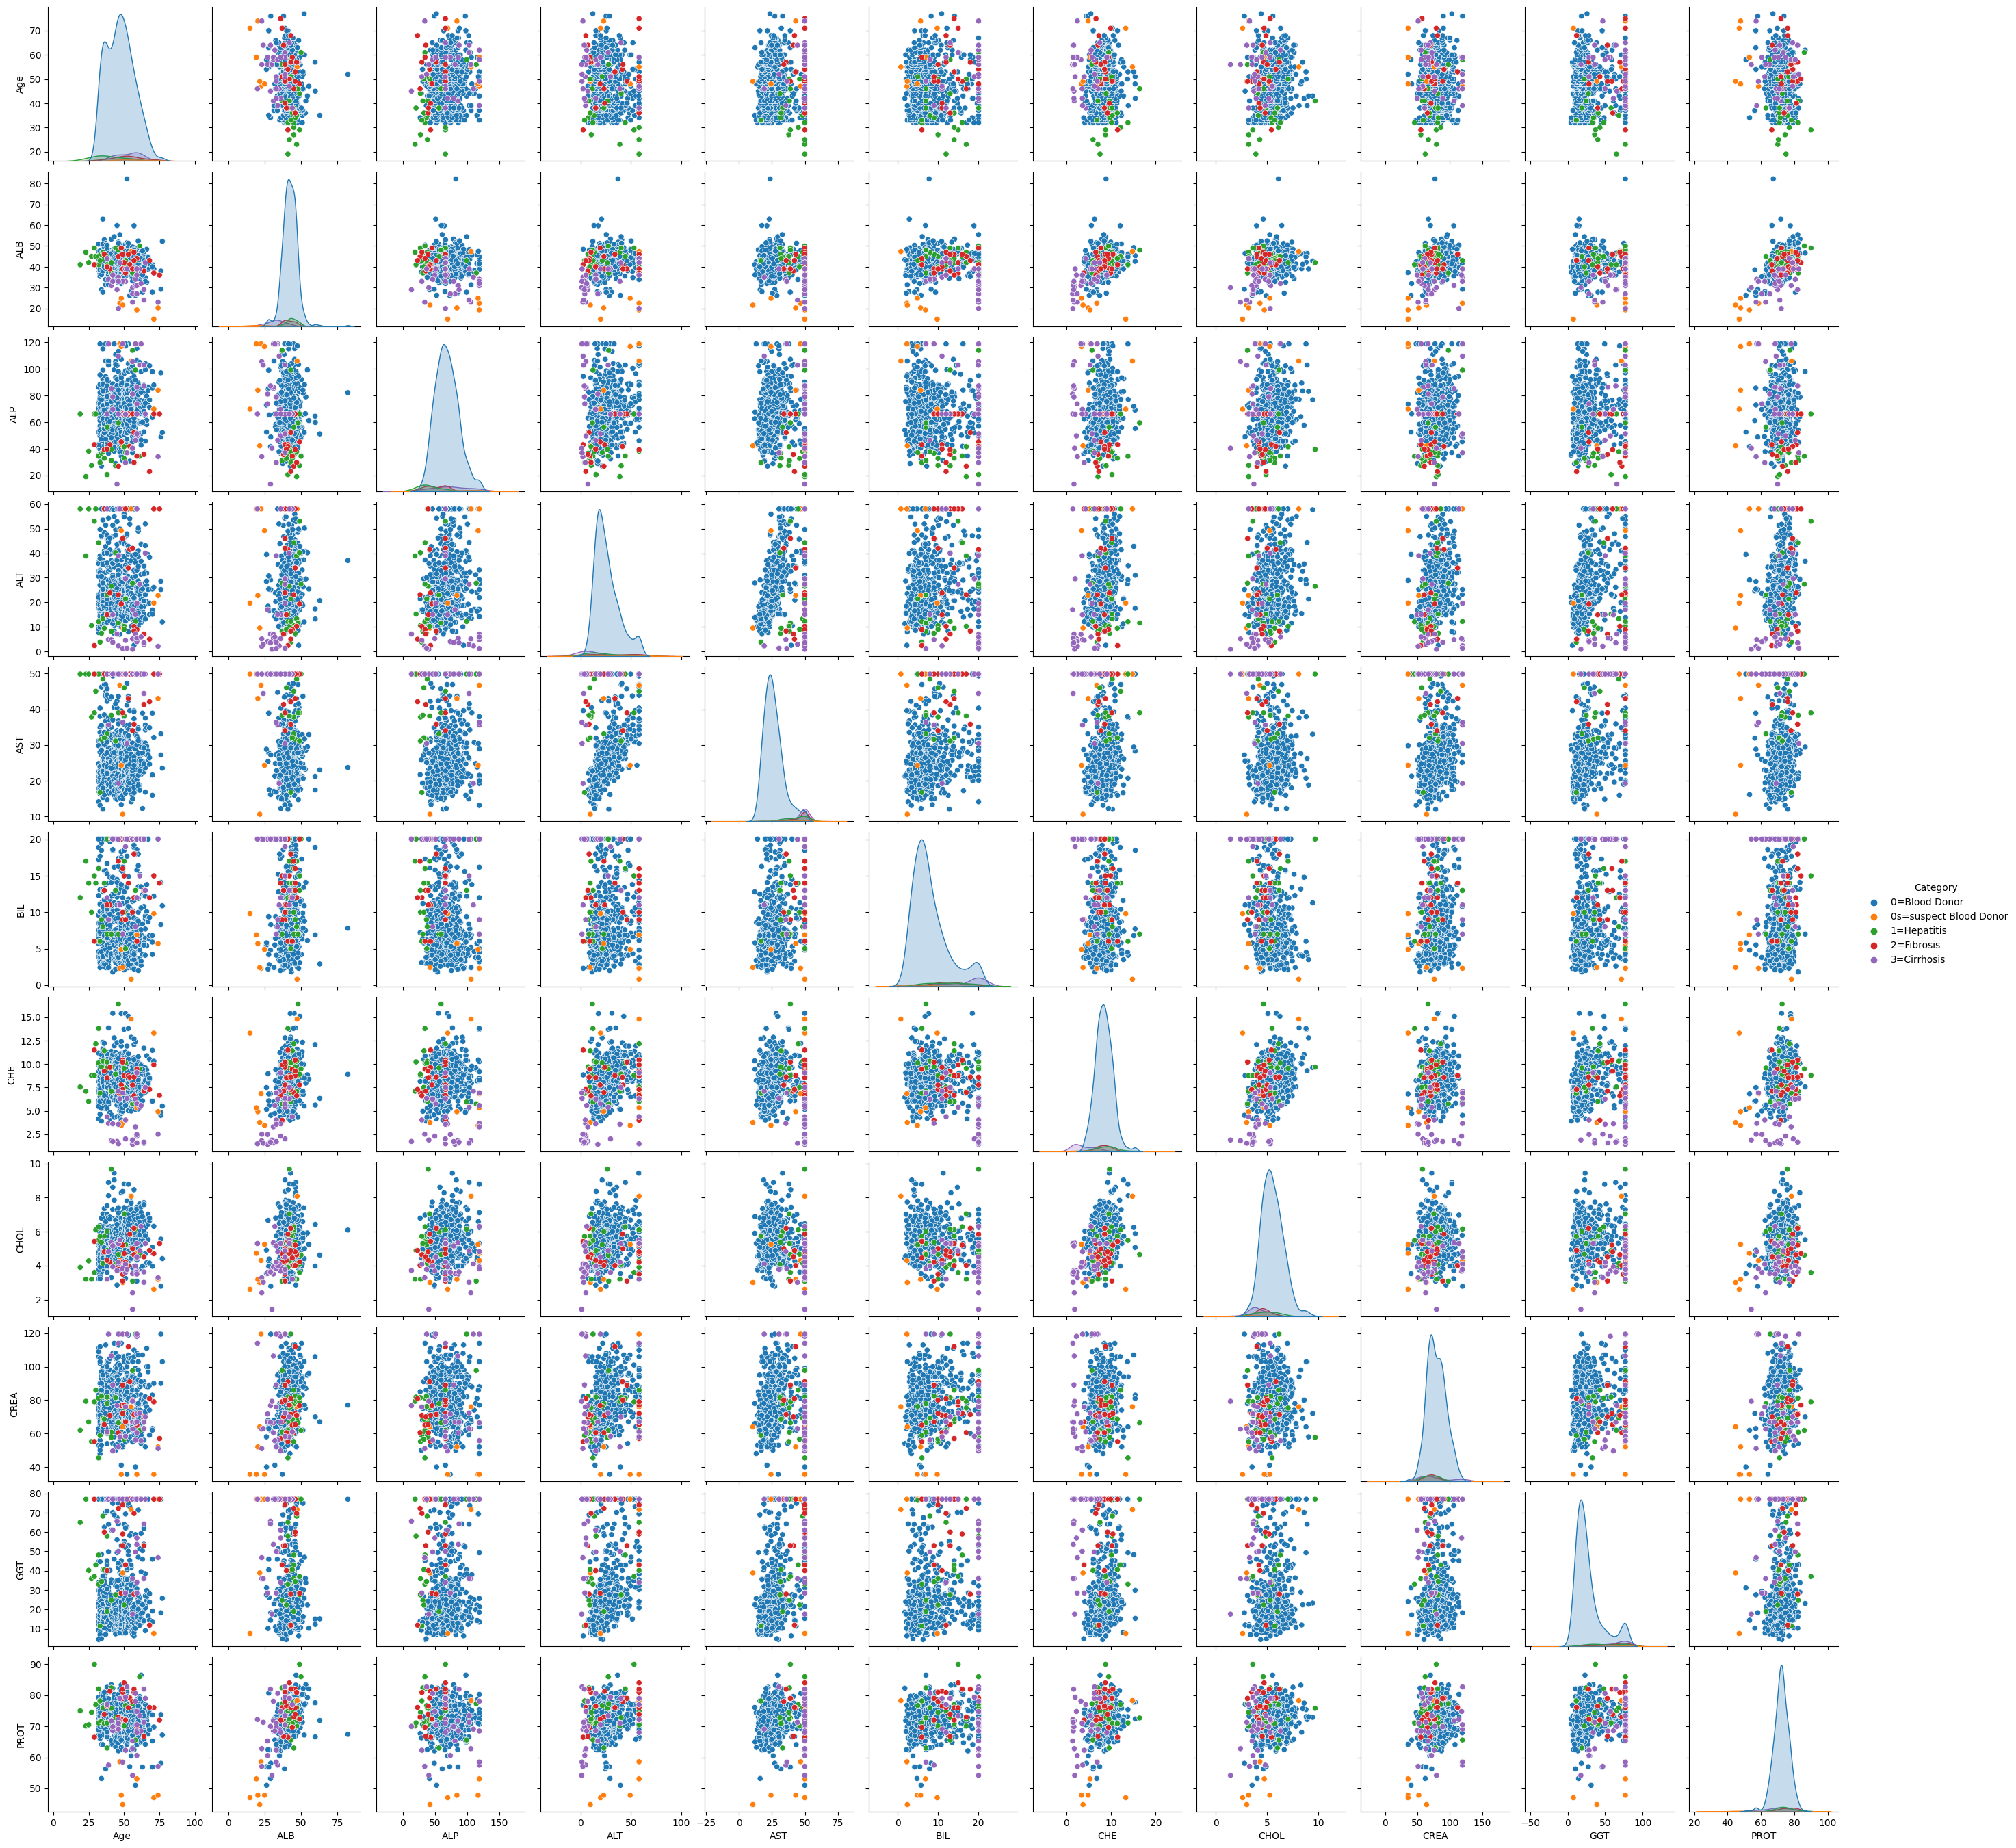

In [ ]:
sns.pairplot(df,hue='Category')

#Enoding The Data

In [ ]:
def encode(data):
  le=LabelEncoder()
  for i in data.columns:
    if data[i].dtype=="object":
      data[i]=le.fit_transform(data[i])
  return data

In [ ]:
encode(df)

Category  Age  Sex   ALB      ALP     ALT    AST    BIL    CHE  CHOL  \
0           0   32    1  38.5   52.500   7.700  22.10   7.50   6.93  3.23   
1           0   32    1  38.5   70.300  18.000  24.70   3.90  11.17  4.80   
2           0   32    1  46.9   74.700  36.200  49.85   6.10   8.84  5.20   
3           0   32    1  43.2   52.000  30.600  22.60  18.90   7.33  4.74   
4           0   32    1  39.2   74.100  32.600  24.80   9.60   9.15  4.32   
..        ...  ...  ...   ...      ...     ...    ...    ...    ...   ...   
610         4   62    0  32.0  118.825   5.900  49.85  20.05   5.57  6.30   
611         4   64    0  24.0  102.800   2.900  44.40  20.00   1.54  3.02   
612         4   64    0  29.0   87.300   3.500  49.85  20.05   1.66  3.63   
613         4   46    0  33.0   66.200  39.000  49.85  20.00   3.56  4.20   
614         4   59    0  36.0   66.200  58.025  49.85  12.00   9.07  5.30   

      CREA    GGT  PROT  
0    106.0  12.10  69.0  
1     74.0  15.60  76.5  
2     86.0  33.20  79.3  
3     80.0  33.80  75.7  
4     76.0  29.90  68.7  
..     ...    ...   ...  
610   55.7  76.95  68.5  
611   63.0  35.90  71.3  
612   66.7  64.20  82.0  
613   52.0  50.00  71.0  
614   67.0  34.00  68.0  

[615 rows x 13 columns]

Sex  Category
0    0           0.903361
     4           0.042017
     3           0.033613
     2           0.016807
     1           0.004202
1    0           0.843501
     2           0.053050
     4           0.053050
     3           0.034483
     1           0.015915
Name: Category, dtype: float64


<Axes: xlabel='Sex', ylabel='Category'>

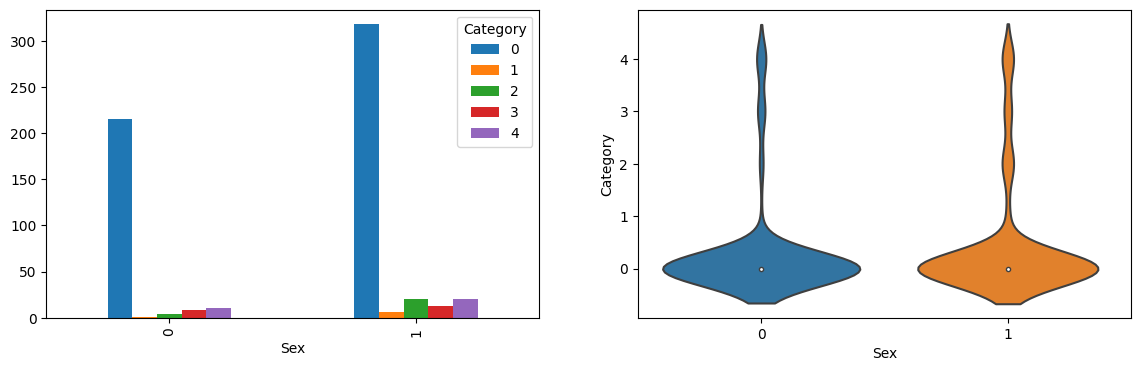

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
pd.crosstab(df.Sex,df.Category).plot(kind="bar",ax=ax1)
s = df.groupby(['Sex'])['Category'].value_counts(normalize=True)
print(s)
sns.violinplot(
    x="Sex",
    y="Category",
    data=df,ax=ax2)

Age  Category
19   2           1.0
23   2           1.0
25   2           1.0
27   2           1.0
29   2           0.5
                ... 
74   1           0.5
     4           0.5
75   3           1.0
76   0           1.0
77   0           1.0
Name: Category, Length: 104, dtype: float64


<Axes: xlabel='Sex', ylabel='Age'>

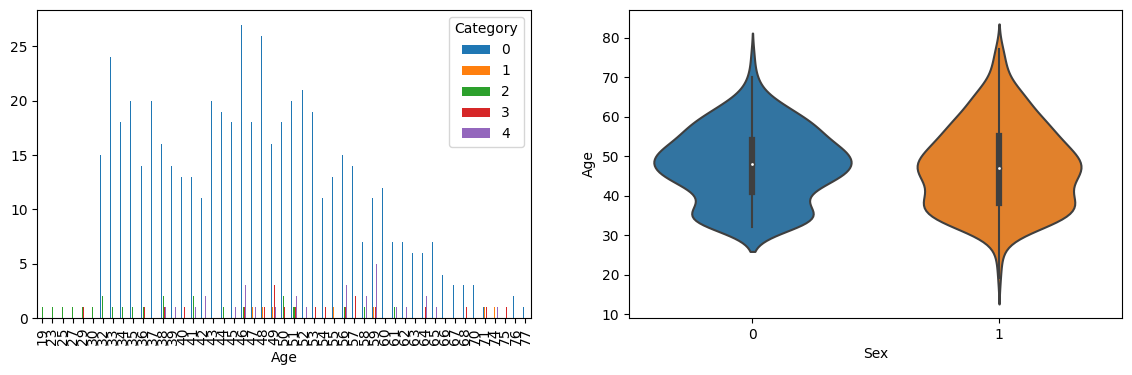

In [ ]:
 fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
pd.crosstab(df.Age,df.Category).plot(kind="bar",ax=ax1)
s = df.groupby(['Age'])['Category'].value_counts(normalize=True)
print(s)
sns.violinplot(
    x="Sex",
    y="Age",
    data=df,ax=ax2)

columns :  Category


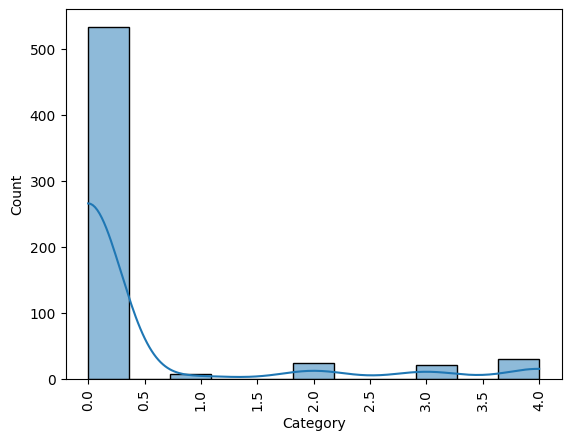

columns :  Age


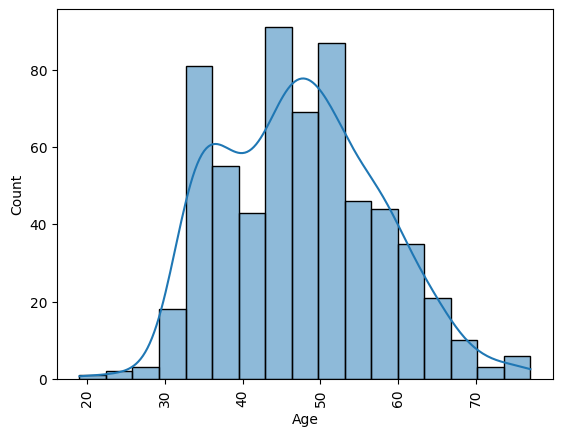

columns :  Sex


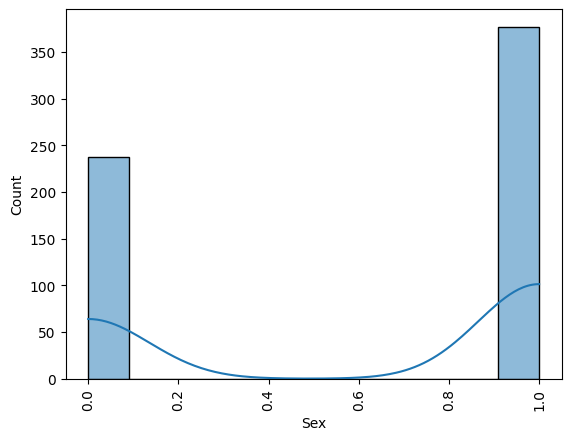

columns :  ALB


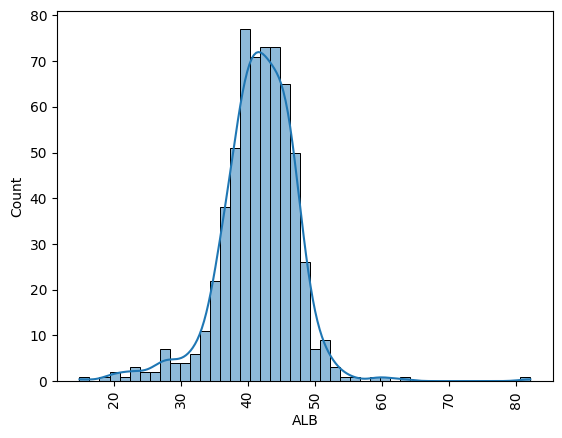

columns :  ALP


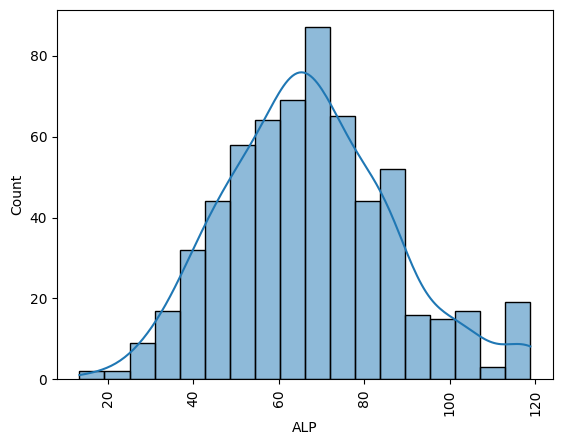

columns :  ALT


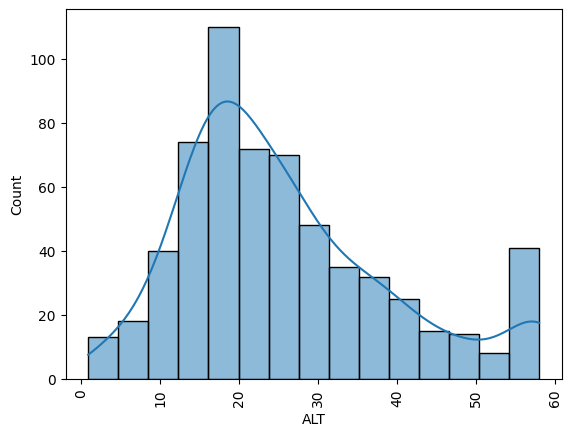

columns :  AST


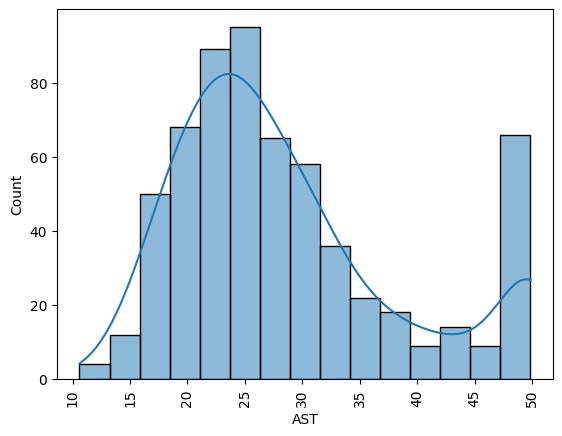

columns :  BIL


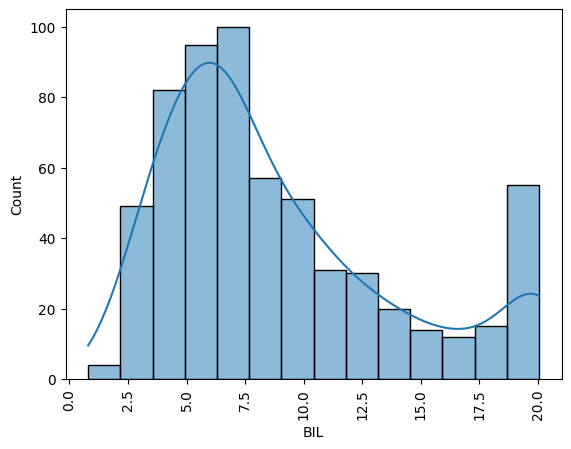

columns :  CHE


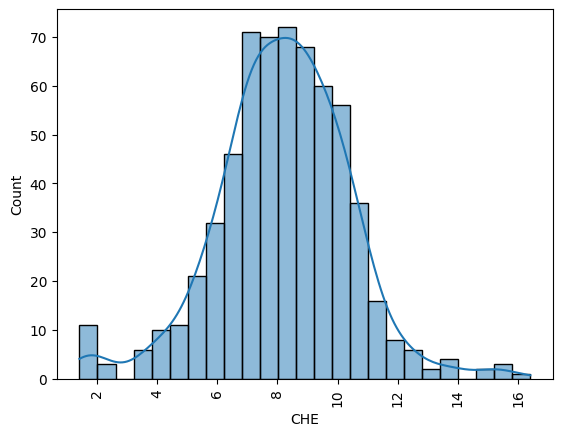

columns :  CHOL


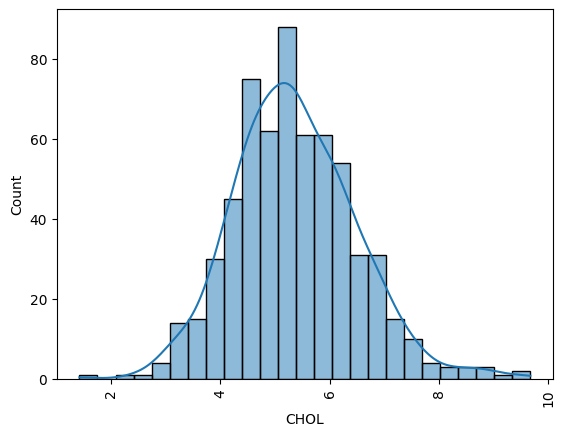

columns :  CREA


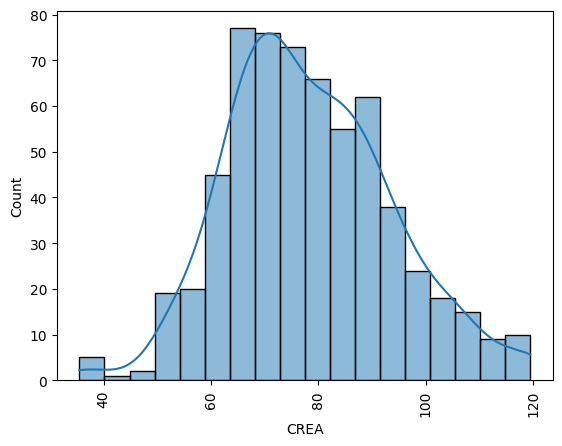

columns :  GGT


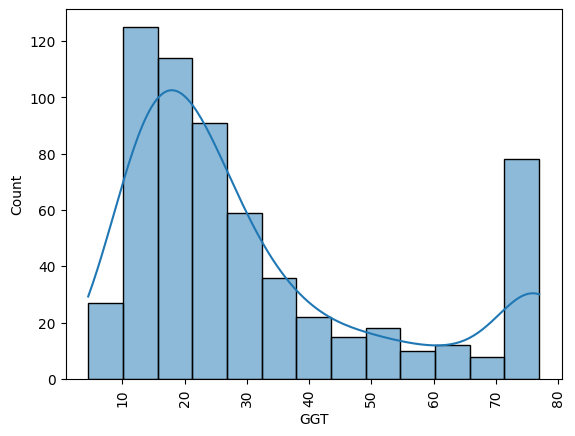

columns :  PROT


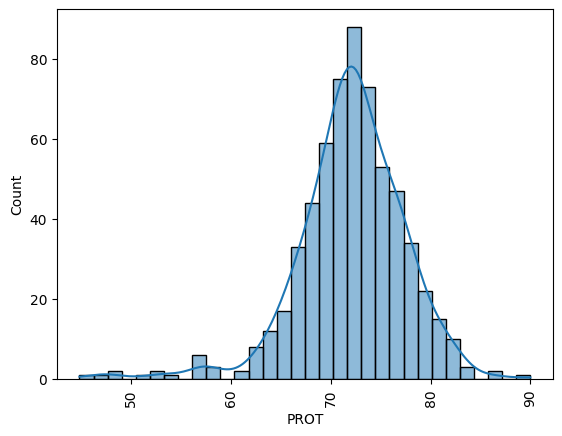

In [ ]:
for i in df.columns:
    sns.histplot(df[i],kde=True)
    print('columns : ' , i )
    plt.xticks(rotation = 'vertical')
    plt.show()

#Importing LIBRARIES

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from scipy.stats import chi2_contingency
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [ ]:
oversample=SMOTE()

In [ ]:
x=df.drop(['Category'],axis=1)
y=df['Category']

In [ ]:
def acc_report(actual,predicted):
   acc_score=accuracy_score(actual,predicted)
   cn_matrix=confusion_matrix(actual,predicted)
   cla_report=classification_report(actual,predicted)
   print('accuracy::',acc_score)
   print(cn_matrix)
   print(cla_report)

In [ ]:
x_smote,y_smote=oversample.fit_resample(x,y)

#Train Test Split

In [ ]:
x_train_smote,x_test_smote,y_train_smote,y_test_smote=train_test_split(x_smote,y_smote,test_size=0.2,random_state=23)

#Models

In [ ]:
lr=LogisticRegression()
lr.fit(x_train_smote,y_train_smote)
preds_ytrain_lr=lr.predict(x_train_smote)
preds_ytest_lr=lr.predict(x_test_smote)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
acc_report(y_train_smote,preds_ytrain_lr)

accuracy:: 0.9113508442776735
[[397   9  19   2   2]
 [  0 432   0   0   0]
 [ 17   0 342  47  11]
 [  0   0  42 385   0]
 [  5   0   0  35 387]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       429
           1       0.98      1.00      0.99       432
           2       0.85      0.82      0.83       417
           3       0.82      0.90      0.86       427
           4       0.97      0.91      0.94       427

    accuracy                           0.91      2132
   macro avg       0.91      0.91      0.91      2132
weighted avg       0.91      0.91      0.91      2132



In [ ]:
acc_report(y_test_smote,preds_ytest_lr)

accuracy:: 0.8855534709193246
[[ 97   2   4   1   0]
 [  0 101   0   0   0]
 [  6   0  88  19   3]
 [  0   0  15  91   0]
 [  0   0   0  11  95]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       104
           1       0.98      1.00      0.99       101
           2       0.82      0.76      0.79       116
           3       0.75      0.86      0.80       106
           4       0.97      0.90      0.93       106

    accuracy                           0.89       533
   macro avg       0.89      0.89      0.89       533
weighted avg       0.89      0.89      0.89       533



In [ ]:
dt=DecisionTreeClassifier()
dt.fit(x_train_smote,y_train_smote)
preds_ytrain_dt=dt.predict(x_train_smote)
preds_ytest_dt=dt.predict(x_test_smote)

In [ ]:
acc_report(y_train_smote,preds_ytrain_dt)

accuracy:: 1.0
[[429   0   0   0   0]
 [  0 432   0   0   0]
 [  0   0 417   0   0]
 [  0   0   0 427   0]
 [  0   0   0   0 427]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       429
           1       1.00      1.00      1.00       432
           2       1.00      1.00      1.00       417
           3       1.00      1.00      1.00       427
           4       1.00      1.00      1.00       427

    accuracy                           1.00      2132
   macro avg       1.00      1.00      1.00      2132
weighted avg       1.00      1.00      1.00      2132



In [ ]:
acc_report(y_test_smote,preds_ytest_dt)

accuracy:: 0.9530956848030019
[[102   0   1   0   1]
 [  3  98   0   0   0]
 [  7   0 104   5   0]
 [  1   0   4 101   0]
 [  1   0   0   2 103]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.94       104
           1       1.00      0.97      0.98       101
           2       0.95      0.90      0.92       116
           3       0.94      0.95      0.94       106
           4       0.99      0.97      0.98       106

    accuracy                           0.95       533
   macro avg       0.95      0.95      0.95       533
weighted avg       0.95      0.95      0.95       533



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rtc=RandomForestClassifier()
rtc.fit(x_train_smote,y_train_smote)
preds_ytest_rtc=rtc.predict(x_test_smote)
preds_ytrain_rtc=rtc.predict(x_train_smote)

In [ ]:
acc_report(y_test_smote,preds_ytest_rtc)
acc_report(y_train_smote,preds_ytrain_rtc)

accuracy:: 0.9924953095684803
[[102   1   1   0   0]
 [  0 101   0   0   0]
 [  0   0 116   0   0]
 [  0   0   1 105   0]
 [  0   0   0   1 105]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       104
           1       0.99      1.00      1.00       101
           2       0.98      1.00      0.99       116
           3       0.99      0.99      0.99       106
           4       1.00      0.99      1.00       106

    accuracy                           0.99       533
   macro avg       0.99      0.99      0.99       533
weighted avg       0.99      0.99      0.99       533

accuracy:: 1.0
[[429   0   0   0   0]
 [  0 432   0   0   0]
 [  0   0 417   0   0]
 [  0   0   0 427   0]
 [  0   0   0   0 427]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       429
           1       1.00      1.00      1.00       432
           2       1.00      1.00      1.00       417
           3     

In [ ]:

gb=GradientBoostingClassifier()
gb.fit(x_train_smote,y_train_smote)
preds_gb_train=gb.predict(x_train_smote)
preds_gb_test=gb.predict(x_test_smote)
acc_report(y_train_smote,preds_gb_train)
acc_report(y_test_smote,preds_gb_test)

accuracy:: 1.0
[[429   0   0   0   0]
 [  0 432   0   0   0]
 [  0   0 417   0   0]
 [  0   0   0 427   0]
 [  0   0   0   0 427]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       429
           1       1.00      1.00      1.00       432
           2       1.00      1.00      1.00       417
           3       1.00      1.00      1.00       427
           4       1.00      1.00      1.00       427

    accuracy                           1.00      2132
   macro avg       1.00      1.00      1.00      2132
weighted avg       1.00      1.00      1.00      2132

accuracy:: 0.9868667917448405
[[101   2   1   0   0]
 [  0 101   0   0   0]
 [  0   0 115   0   1]
 [  0   0   2 104   0]
 [  0   0   0   1 105]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       104
           1       0.98      1.00      0.99       101
           2       0.97      0.99      0.98       116
           3     

In [ ]:
np.sqrt(2132)

46.17358552246078

In [ ]:
knn=KNeighborsClassifier(n_neighbors=47)
knn.fit(x_train_smote,y_train_smote)
preds_ytrain_knn=knn.predict(x_train_smote)
preds_ytest_knn=knn.predict(x_test_smote)
acc_report(y_train_smote,preds_ytrain_knn)
acc_report(y_test_smote,preds_ytest_knn)


accuracy:: 0.9099437148217636
[[371  13  10  27   8]
 [  1 431   0   0   0]
 [ 10   1 384   6  16]
 [  0   0  47 380   0]
 [  0   0   3  50 374]]
              precision    recall  f1-score   support

           0       0.97      0.86      0.91       429
           1       0.97      1.00      0.98       432
           2       0.86      0.92      0.89       417
           3       0.82      0.89      0.85       427
           4       0.94      0.88      0.91       427

    accuracy                           0.91      2132
   macro avg       0.91      0.91      0.91      2132
weighted avg       0.91      0.91      0.91      2132

accuracy:: 0.8949343339587242
[[ 86   2   4   9   3]
 [  0 101   0   0   0]
 [  6   0 106   1   3]
 [  0   0  13  93   0]
 [  0   0   0  15  91]]
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       104
           1       0.98      1.00      0.99       101
           2       0.86      0.91      0.89       116
  

In [ ]:
svc=SVC()
svc.fit(x_train_smote,y_train_smote)
svc_preds_train_smote=svc.predict(x_train_smote)
svc_preds_test_smote=svc.predict(x_test_smote)

In [ ]:
acc_report(y_train_smote,svc_preds_train_smote)

accuracy:: 0.9132270168855535
[[406   6   4  12   1]
 [  0 432   0   0   0]
 [ 13   0 356  33  15]
 [  0   0  57 370   0]
 [  0   0   0  44 383]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       429
           1       0.99      1.00      0.99       432
           2       0.85      0.85      0.85       417
           3       0.81      0.87      0.84       427
           4       0.96      0.90      0.93       427

    accuracy                           0.91      2132
   macro avg       0.91      0.91      0.91      2132
weighted avg       0.92      0.91      0.91      2132



In [ ]:
acc_report(y_test_smote,svc_preds_test_smote)

accuracy:: 0.8874296435272045
[[ 99   1   2   2   0]
 [  0 101   0   0   0]
 [  6   0  91  16   3]
 [  0   0  17  89   0]
 [  0   0   0  13  93]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       104
           1       0.99      1.00      1.00       101
           2       0.83      0.78      0.81       116
           3       0.74      0.84      0.79       106
           4       0.97      0.88      0.92       106

    accuracy                           0.89       533
   macro avg       0.89      0.89      0.89       533
weighted avg       0.89      0.89      0.89       533



#Conclusion : Random Forest and Gradient Boosting works well on this model after smote